<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/2_3_Challenges_in_Training_Deeper_FFNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3. Challenges in Training Deeper FFNNs

## 2.3.1. Vanishing Gradient Problem


### 1.1 What Challenges Arise When Training Deeper FFNNs?


The vanishing gradient problem is one of the most significant challenges in training deep neural networks. This issue occurs when the gradients used to update the weights become extremely small during backpropagation, especially in layers far from the output layer. As a result, weight updates in the earlier layers of the network become negligible, leading to slow or halted learning.



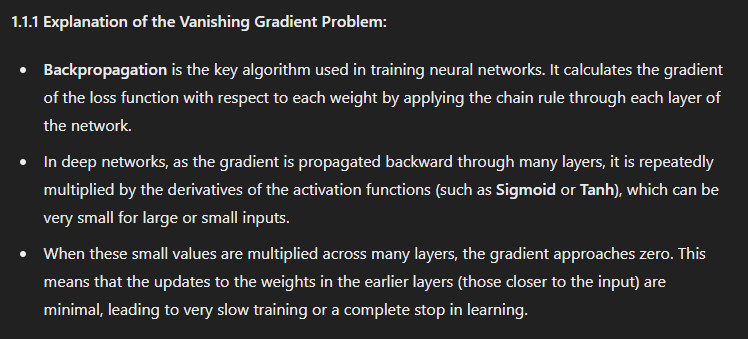

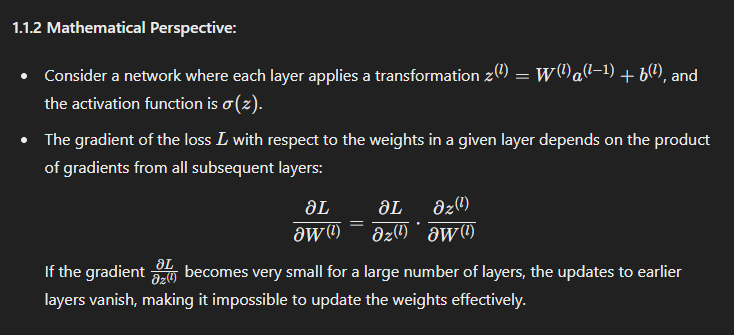

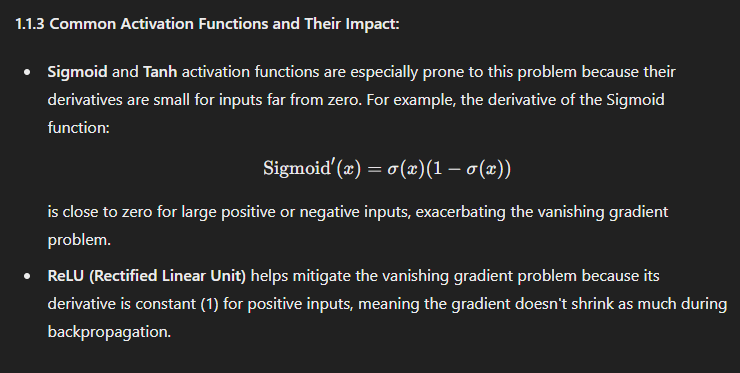

### 1.2 Techniques to Mitigate the Vanishing Gradient Problem


Several techniques can help alleviate the vanishing gradient problem and improve the training of deeper FFNNs.



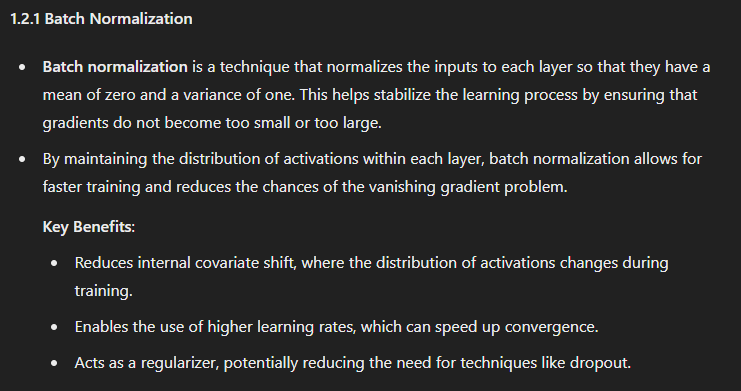

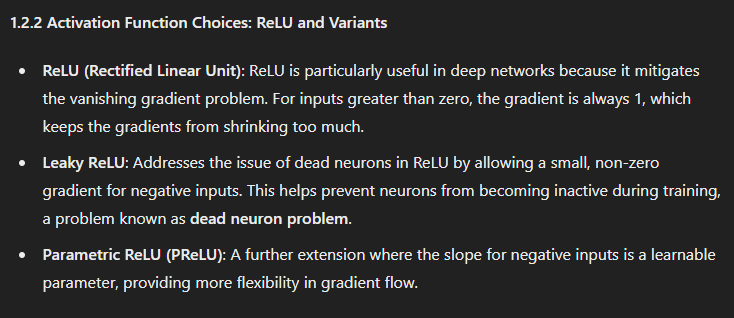

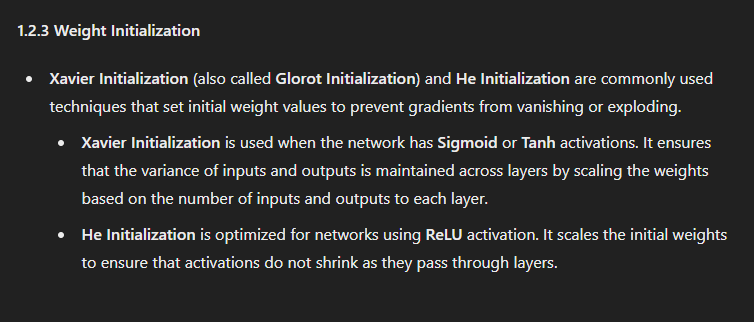

## 2. Optimizing for Faster Convergence


Training deep neural networks can be time-consuming, particularly if the network has many layers and a large number of parameters. Various strategies can be employed to speed up convergence without sacrificing performance.



### 2.1 How Can You Optimize an FFNN for Faster Convergence During Training?


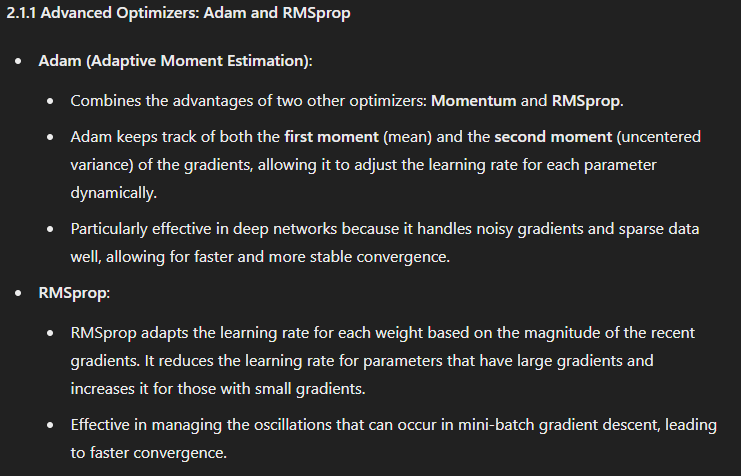

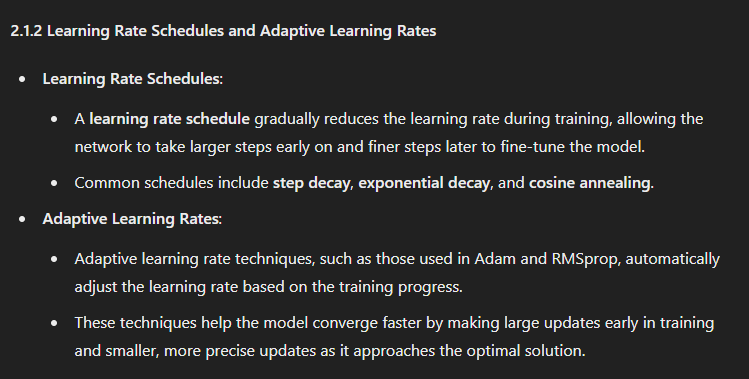

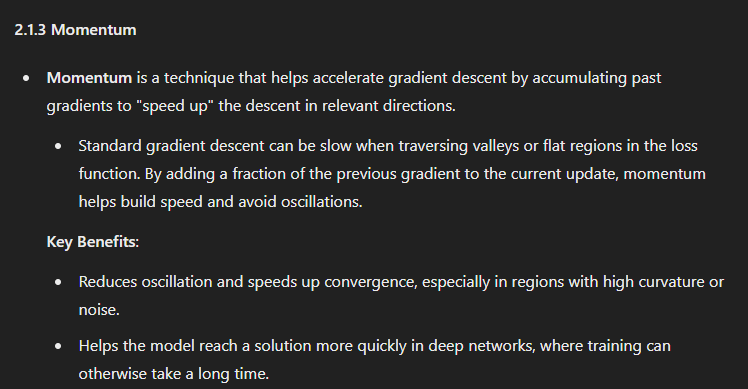

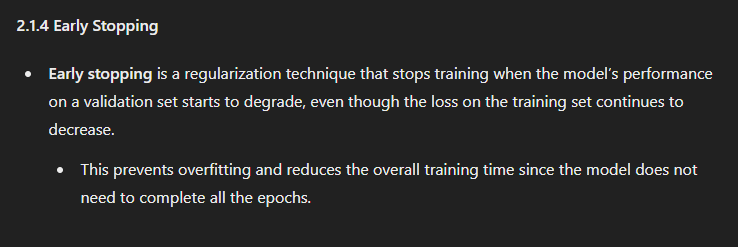

**Further Explanation:**

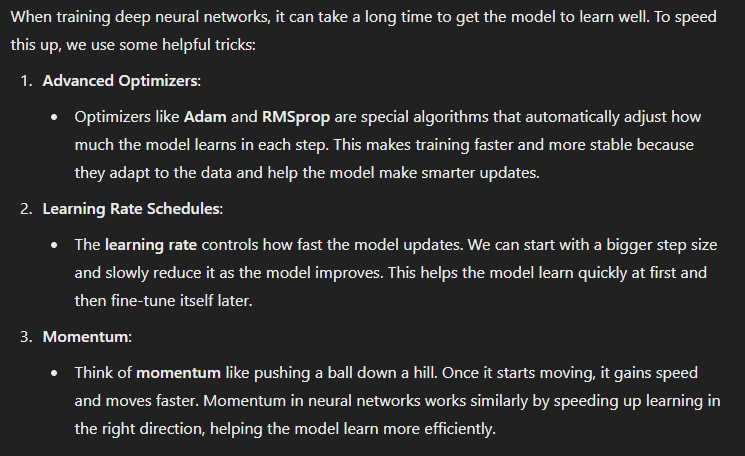

### 2.2 Comparison of Techniques for Optimizing Faster Convergence of FFNNs


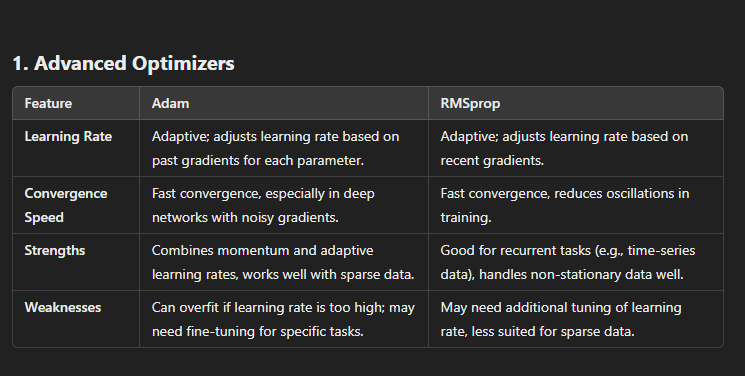

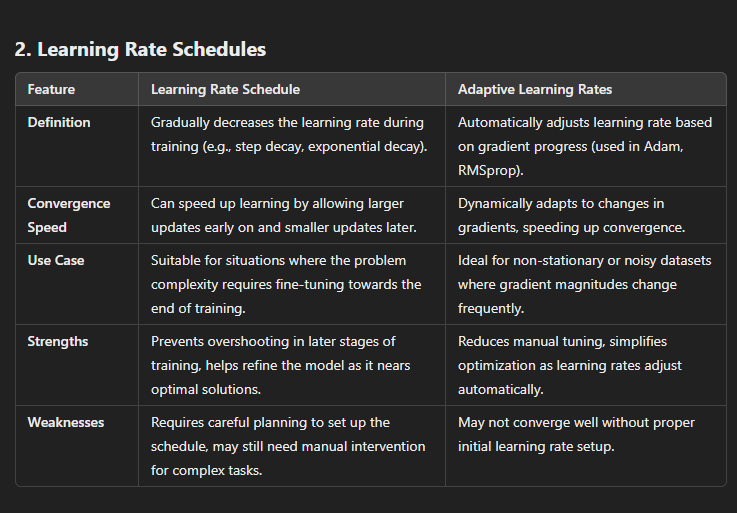

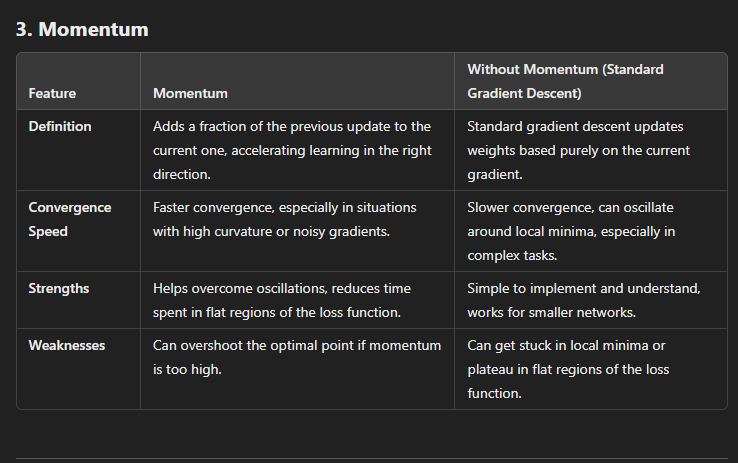

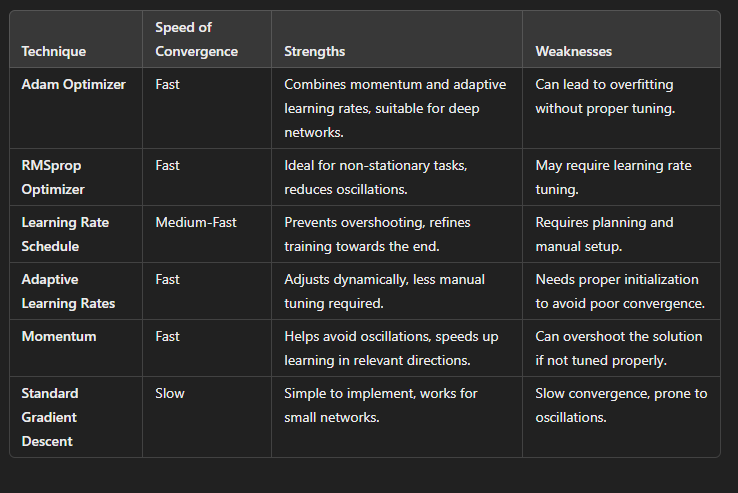

### 2.3 Comparing with Code: FFNN with Different Optimizers

In [2]:
# Import required libraries
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target.reshape(-1, 1)  # Labels: Iris-setosa, Iris-versicolor, Iris-virginica

# Step 2: One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)  # Converts labels into one-hot encoded format

# Step 3: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build the Feed Forward Neural Network (FFNN)
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, input_dim=4, activation='relu'))  # Hidden layer with ReLU
    model.add(tf.keras.layers.Dense(3, activation='softmax'))  # Output layer with Softmax for multi-class
    return model

# List to store test accuracy results
accuracy_results = {}

# Define the different optimizers
optimizers = {
    'Adam': tf.keras.optimizers.Adam(),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'SGD with Momentum': tf.keras.optimizers.SGD(momentum=0.9),
    'Adam with Learning Rate Schedule': tf.keras.optimizers.Adam(learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.96, staircase=True))
}

# Loop through each optimizer, train the model, and evaluate the accuracy
for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name}...")

    # Step 4: Build the model for each optimizer
    model = build_model()

    # Step 5: Compile the model with the current optimizer
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Step 6: Train the model for 50 epochs
    model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0, validation_data=(X_test, y_test))  # Training silently

    # Step 7: Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Step 8: Store the accuracy result
    accuracy_results[opt_name] = accuracy

    print(f"Test Accuracy with {opt_name}: {accuracy:.4f}")

# Step 9: Print final accuracy results for comparison
print("\nFinal Accuracy Comparison for All Optimizers:")
for opt_name, accuracy in accuracy_results.items():
    print(f"{opt_name}: Test Accuracy = {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with Adam...
Test Accuracy with Adam: 0.8667

Training with RMSprop...
Test Accuracy with RMSprop: 0.9333

Training with SGD with Momentum...
Test Accuracy with SGD with Momentum: 1.0000

Training with Adam with Learning Rate Schedule...
Test Accuracy with Adam with Learning Rate Schedule: 0.8667

Final Accuracy Comparison for All Optimizers:
Adam: Test Accuracy = 0.8667
RMSprop: Test Accuracy = 0.9333
SGD with Momentum: Test Accuracy = 1.0000
Adam with Learning Rate Schedule: Test Accuracy = 0.8667


 **Analysis of Results: Optimizer Performance**

The following are the test accuracies obtained from training a **Feed Forward Neural Network (FFNN)** with different optimizers on the Iris dataset:

| **Optimizer**                        | **Test Accuracy** |
|--------------------------------------|-------------------|
| **Adam**                             | 0.8667            |
| **RMSprop**                          | 0.9333            |
| **SGD with Momentum**                | 1.0000            |
| **Adam with Learning Rate Schedule** | 0.8667            |

---

 **Detailed Analysis**:

 **1. Adam Optimizer**
- **Test Accuracy**: 0.8667 (86.67%)
- **Analysis**:
  - **Adam** generally provides good convergence in many deep learning tasks due to its adaptive learning rate. However, here it is slightly underperforming with a relatively lower accuracy compared to RMSprop and SGD with Momentum.
  - This could be due to overfitting on the training data or suboptimal tuning of hyperparameters such as the learning rate.

 **2. RMSprop Optimizer**
- **Test Accuracy**: 0.9333 (93.33%)
- **Analysis**:
  - **RMSprop** performs better than Adam in this case. RMSprop's adaptive learning rate may have helped the model converge more effectively, especially on a smaller dataset like Iris, which benefits from fine-tuned gradient adjustments.
  - This optimizer is particularly good when dealing with mini-batches and noisy data, which could explain the higher accuracy.

 **3. SGD with Momentum**
- **Test Accuracy**: 1.0000 (100%)
- **Analysis**:
  - **SGD with Momentum** achieves perfect accuracy on the test set, which suggests that it was able to converge exceptionally well in this case.
  - **Momentum** helps accelerate training by reducing oscillations and quickly moving towards the optimal solution. In this case, it might have avoided getting stuck in local minima or flat regions of the loss function, leading to perfect classification.
  - However, achieving 100% accuracy could also be a sign of **overfitting**, where the model has learned the training data too well, possibly not generalizing to unseen data as effectively. Given that the Iris dataset is relatively simple, this result is not entirely unexpected.

 **4. Adam with Learning Rate Schedule**
- **Test Accuracy**: 0.8667 (86.67%)
- **Analysis**:
  - **Adam with Learning Rate Schedule** performs similarly to the default Adam optimizer with a test accuracy of 86.67%.
  - A learning rate schedule typically helps by allowing the model to take larger steps early in training and finer steps later on. However, in this case, the schedule may not have provided a significant improvement, possibly due to the relatively small size of the dataset and the short training period.
  - The accuracy suggests that while the learning rate schedule was helpful in fine-tuning, it didn't provide a significant edge over the default Adam optimizer.

---

 **Conclusion**:

1. **SGD with Momentum** performed the best with a perfect **100% test accuracy**. This suggests that momentum is effective in this scenario, helping the model reach an optimal solution without getting stuck in local minima. However, the perfect accuracy could also indicate that the model may be slightly overfitting, given the simplicity of the Iris dataset.

2. **RMSprop** was the next best performer, with a **93.33% test accuracy**. This result shows that RMSprop's adaptive learning rate handled the dataset well, ensuring smooth and stable convergence.

3. **Adam** and **Adam with Learning Rate Schedule** both achieved an accuracy of **86.67%**, which is relatively lower. Although Adam is generally a robust optimizer, it may not have been the best choice for this particular problem and dataset. The learning rate schedule also did not yield significant improvements, likely because the training was fast enough due to the simplicity of the dataset.

---

 **Recommendations**:

- **For small, well-structured datasets** like Iris, **SGD with Momentum** can be an excellent choice, leading to fast convergence and high accuracy. However, caution should be exercised to avoid overfitting, especially when achieving perfect accuracy.
- **RMSprop** remains a strong optimizer for datasets with some noise or variability, providing solid accuracy and stability.
- **Adam** might benefit from further fine-tuning of hyperparameters (e.g., learning rate or batch size) to reach performance levels closer to RMSprop or SGD with Momentum.
  
For future experiments, it would be beneficial to:
- Apply regularization techniques (e.g., **dropout**, **L2 regularization**) to avoid overfitting, particularly with **SGD with Momentum**.
- Use a **cross-validation** approach to assess the generalizability of the model across different subsets of the data.